## Some useful Papers:

1. "LADDER, a sketching language for user interface developers": https://rationale.csail.mit.edu/publications/Hammond2005Ladder.pdf

2. "Paleosketch: Accurate Primitive Sketch Recognition and Beautification": https://www.cs.ucf.edu/courses/cap6105/fall2015/readings/paulson.pdf

3. "A Line Extraction Algorithm for Hand Drawings":  https://jcst.ict.ac.cn/article/id/298

4. "Line tracking algorithm for scribbled drawings":  https://www.um.edu.mt/library/oar/bitstream/123456789/19662/1/OA%20Conference%20paper%20-%20%20Line%20tracking%20algorithm%20for%20scribbled%20drawings%20%281%29.pdf

5. "Robust and accurate vectorization of line drawings": https://inria.hal.science/inria-00000394/file/TPAMI-Hilaire-Tombre-Jun06.pdf

6. "Neatening sketched strokes using piecewise French curves": https://www.dgp.toronto.edu/~mccrae/projects/french/mccraeSBIM2011.pdf



# Part A: Image-based Line straightening (with OpenCV)

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


In [6]:
uploaded = files.upload()
image_path = next(iter(uploaded))

Saving Screenshot from 2025-07-18 20-32-30.png to Screenshot from 2025-07-18 20-32-30.png


In [7]:

# Load as grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


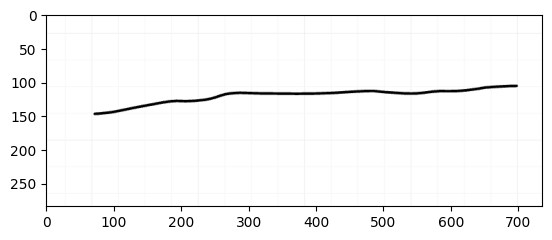

In [9]:
plt.imshow(img, cmap = 'gray')

In [10]:
# Edge detection
edges = cv2.Canny(img, 50, 150)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
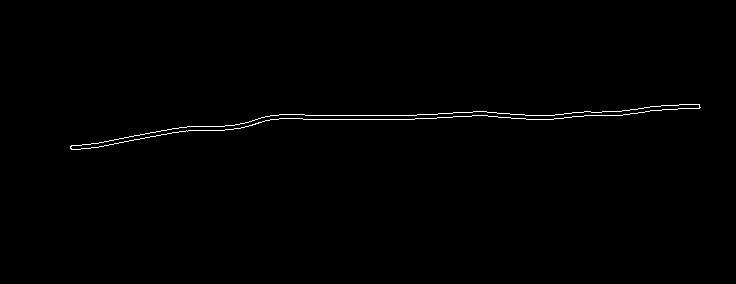

In [13]:
edges

In [11]:
# Hough Transform for straight lines
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=50, minLineLength=30, maxLineGap=10)


In [12]:
lines

array([[[305, 115, 416, 115]],

       [[303, 119, 414, 119]],

       [[437, 117, 482, 115]],

       [[527, 115, 571, 113]],

       [[ 79, 149, 192, 130]],

       [[ 70, 147, 191, 126]],

       [[638, 112, 700, 107]],

       [[453, 112, 486, 111]],

       [[650, 106, 699, 104]],

       [[203, 130, 233, 129]]], dtype=int32)

In [16]:
# Draw lines on a color image
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)


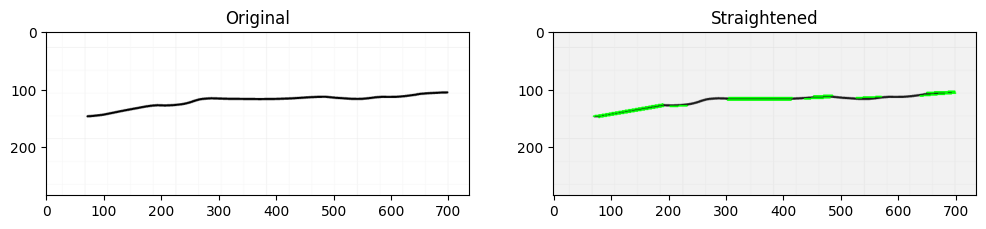

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Straightened")
plt.imshow(output)
plt.show()

# Part B: Point-based real-time Line Straightening (with RANSAC)

I prefer this (makes the most sense to sample the points, and fit a line)

In [20]:
from sklearn.linear_model import RANSACRegressor

In [21]:
# Simulate noisy hand-drawn line points
np.random.seed(42)
x = np.linspace(0, 10, 100) + np.random.normal(0, 0.3, 100)
y = 2 * x + 1 + np.random.normal(0, 1, 100)

In [26]:
x_reshaped = x.reshape(-1, 1)

In [31]:
model = RANSACRegressor()
model

RANSACRegressor()

In [33]:
model.fit(x_reshaped, y)

RANSACRegressor()

In [34]:
# Predict straightened line
line_x = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
line_y = model.predict(line_x)

In [35]:
line_x

array([[0.05953081],
       [0.15922872],
       [0.25892663],
       [0.35862454],
       [0.45832245],
       [0.55802036],
       [0.65771827],
       [0.75741618],
       [0.85711409],
       [0.956812  ],
       [1.05650991],
       [1.15620782],
       [1.25590573],
       [1.35560364],
       [1.45530154],
       [1.55499945],
       [1.65469736],
       [1.75439527],
       [1.85409318],
       [1.95379109],
       [2.053489  ],
       [2.15318691],
       [2.25288482],
       [2.35258273],
       [2.45228064],
       [2.55197855],
       [2.65167646],
       [2.75137437],
       [2.85107228],
       [2.95077019],
       [3.0504681 ],
       [3.15016601],
       [3.24986392],
       [3.34956183],
       [3.44925974],
       [3.54895765],
       [3.64865556],
       [3.74835347],
       [3.84805138],
       [3.94774928],
       [4.04744719],
       [4.1471451 ],
       [4.24684301],
       [4.34654092],
       [4.44623883],
       [4.54593674],
       [4.64563465],
       [4.745

In [36]:
line_y

array([ 1.15155541,  1.3507443 ,  1.5499332 ,  1.7491221 ,  1.948311  ,
        2.1474999 ,  2.34668879,  2.54587769,  2.74506659,  2.94425549,
        3.14344439,  3.34263328,  3.54182218,  3.74101108,  3.94019998,
        4.13938888,  4.33857777,  4.53776667,  4.73695557,  4.93614447,
        5.13533336,  5.33452226,  5.53371116,  5.73290006,  5.93208896,
        6.13127785,  6.33046675,  6.52965565,  6.72884455,  6.92803345,
        7.12722234,  7.32641124,  7.52560014,  7.72478904,  7.92397794,
        8.12316683,  8.32235573,  8.52154463,  8.72073353,  8.91992242,
        9.11911132,  9.31830022,  9.51748912,  9.71667802,  9.91586691,
       10.11505581, 10.31424471, 10.51343361, 10.71262251, 10.9118114 ,
       11.1110003 , 11.3101892 , 11.5093781 , 11.708567  , 11.90775589,
       12.10694479, 12.30613369, 12.50532259, 12.70451148, 12.90370038,
       13.10288928, 13.30207818, 13.50126708, 13.70045597, 13.89964487,
       14.09883377, 14.29802267, 14.49721157, 14.69640046, 14.89

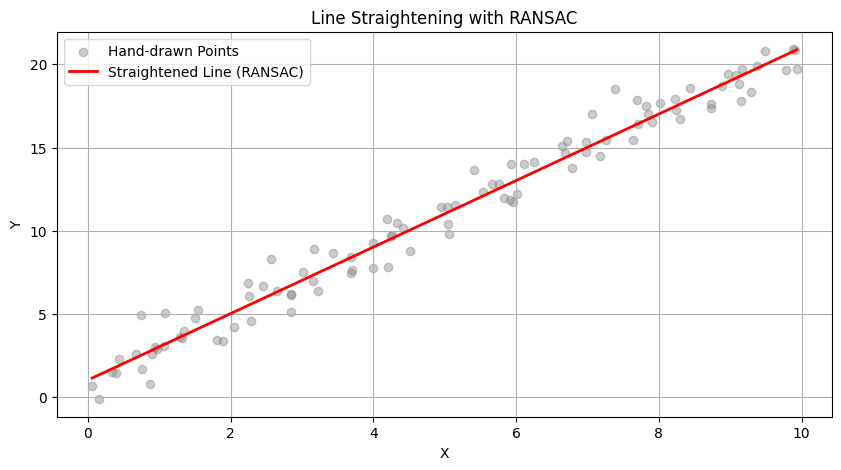

In [37]:
# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.4, label="Hand-drawn Points", color='gray')
plt.plot(line_x, line_y, color='red', label="Straightened Line (RANSAC)", linewidth=2)
plt.legend()
plt.title("Line Straightening with RANSAC")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

### Applying RANSAC to Extracted edge points from an image

In [38]:
uploaded = files.upload()
image_path = next(iter(uploaded))

Saving Screenshot from 2025-07-18 20-32-30.png to Screenshot from 2025-07-18 20-32-30 (1).png


In [39]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

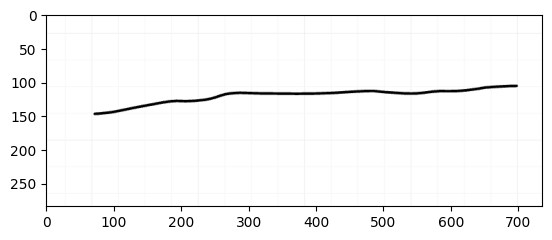

In [41]:
plt.imshow(img, cmap = 'gray')

In [42]:
edges = cv2.Canny(img, 50, 150)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
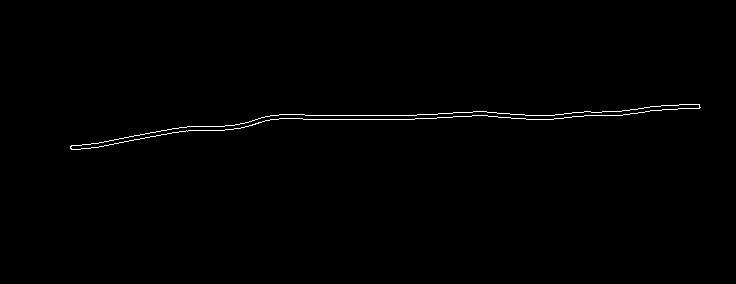

In [43]:
edges

In [44]:
ys, xs = np.where(edges > 0)
points = np.column_stack((xs, ys))

In [45]:
points

array([[679, 104],
       [680, 104],
       [681, 104],
       ...,
       [ 78, 149],
       [ 79, 149],
       [ 80, 149]])

In [46]:
# Use RANSAC to fit a straight line (x is input, y is target)
# We'll model y = a*x + b
X = points[:, 0].reshape(-1, 1)  # x values
Y = points[:, 1]                # y values

In [47]:
X

array([[679],
       [680],
       [681],
       ...,
       [ 78],
       [ 79],
       [ 80]])

In [48]:
y

array([-0.11734225,  0.6984163 ,  1.44993901,  1.71760125,  1.50630307,
        2.27366969,  5.0458348 ,  3.04918006,  2.59202738,  3.06927193,
        0.82338019,  2.91627049,  3.62965   ,  4.94153659,  2.60097116,
        3.99447786,  3.58991279,  3.4542138 ,  5.23437201,  4.74293465,
        6.71082525,  4.19757101,  6.88775568,  3.38976467,  6.10871231,
        8.30751423,  4.57139278,  6.11366654,  6.39583381,  6.18009395,
        5.14891866,  8.44255615,  6.39424442,  7.50563254,  7.44278958,
        8.88813529,  7.61479214,  6.97688388,  8.69337326,  7.7660403 ,
        9.75134796, 10.69279201,  7.80797628,  9.69084033,  9.26165849,
       10.44082544,  8.77959532,  9.80876622, 11.42508224, 10.13815048,
       11.54595333, 11.41842914, 10.41887258, 12.30633018, 12.8207631 ,
       11.95552776, 13.67537531, 12.80345701, 11.72462628, 14.1610726 ,
       11.85902591, 13.99892154, 14.02004712, 12.18886643, 15.38018455,
       15.35783808, 15.11218742, 17.03426626, 14.70896724, 13.79

In [49]:
ransac = RANSACRegressor()
ransac

RANSACRegressor()

In [50]:
ransac.fit(X, Y)

RANSACRegressor()

In [51]:
line_x = np.linspace(min(X)[0], max(X)[0], 100)
line_y = ransac.predict(line_x.reshape(-1, 1))

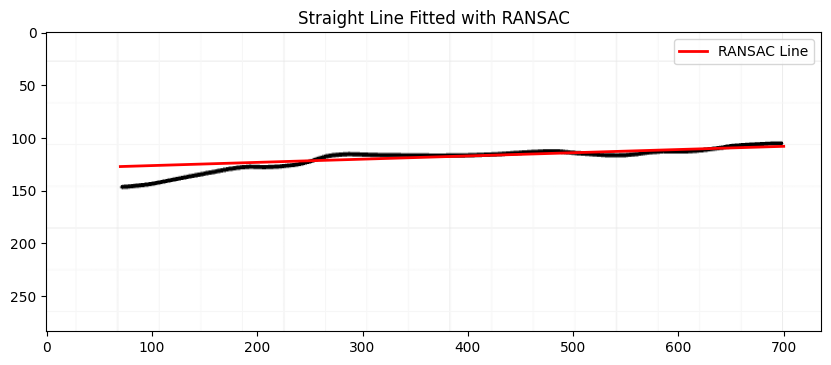

In [52]:
plt.figure(figsize=(10, 6))
plt.imshow(img, cmap='gray')
plt.plot(line_x, line_y, color='red', linewidth=2, label="RANSAC Line")
plt.title("Straight Line Fitted with RANSAC")
plt.legend()
plt.show()

# Part C: Polyline Simplification with RDP (Ramer-Douglas-Peucker) Algorithm

- used often in digital ink smoothing

In [61]:
!pip install rdp opencv-python-headless

  Preparing metadata (setup.py) ... done
  Created wheel for rdp: filename=rdp-0.8-py3-none-any.whl size=4585 sha256=d925b433b08b615db66e810d03b804930153c31920ef4ee87807e21f2d60529e
  Stored in directory: /root/.cache/pip/wheels/40/25/67/b7065f31a9d5388f822ed08341da456e2dd047a1dbae2cf62a
Successfully built rdp


In [62]:
from rdp import rdp

In [54]:
uploaded = files.upload()
image_path = next(iter(uploaded))

Saving Screenshot from 2025-07-18 20-32-30.png to Screenshot from 2025-07-18 20-32-30 (2).png


In [56]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 50, 150)

In [57]:
# Get contour points (the outer paths)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


In [58]:
contours

(array([[[679, 104]],
 
        [[678, 105]],
 
        [[677, 105]],
 
        ...,
 
        [[682, 104]],
 
        [[681, 104]],
 
        [[680, 104]]], dtype=int32),)

In [59]:
# RDP applied on first contour (we can loop through multiple)
simplified_lines = []
epsilon = 5  # adjusted for simplicity vs accuracy

In [63]:
for cnt in contours:
    simplified = rdp(cnt[:, 0, :], epsilon=epsilon)
    simplified_lines.append(np.array(simplified))

In [64]:
simplified_lines

[array([[679, 104],
        [554, 115],
        [279, 114],
        [ 71, 149],
        [279, 118],
        [553, 119],
        [699, 108],
        [680, 104]], dtype=int32)]

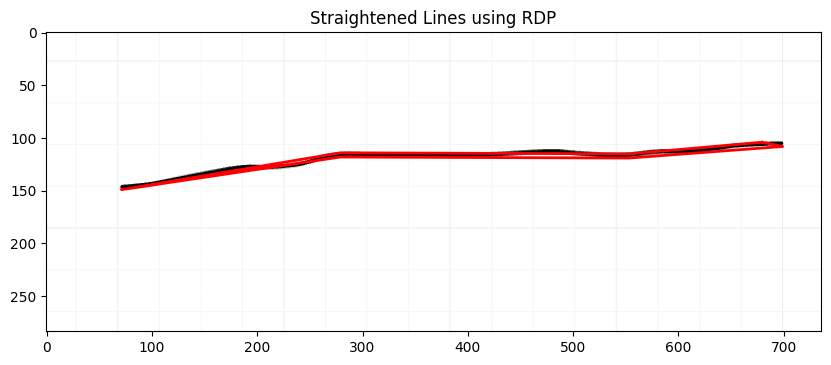

In [69]:
# Plot original and simplified
plt.figure(figsize=(10, 6))
plt.imshow(img, cmap='gray')

for line in simplified_lines:
    plt.plot(line[:, 0], line[:, 1], color='red', linewidth=2)

plt.title("Straightened Lines using RDP")
plt.show()

# Part D: Simplified Vectorization Framework

In [89]:
!pip install opencv-python-headless numpy scipy sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [88]:
import cv2, numpy as np
from scipy.signal import correlate2d

In [90]:
# Step 1: Multi-resolution edge detection by normalized cross-correlation
def multi_scale_edge_detect(img, template_sizes=[3,5,7]):
    edges = np.zeros_like(img, dtype=float)
    for sz in template_sizes:
        tpl = np.ones((sz,sz))/sz**2
        corr = correlate2d(img.astype(float), tpl, mode='same')
        edges += corr
    edges = (edges - edges.min())/(edges.max()-edges.min())
    return (edges*255).astype(np.uint8)

In [91]:

# Step 2: Thinning to one‑pixel centerlines
def thin(img):
    return cv2.ximgproc.thinning(img) if hasattr(cv2.ximgproc, 'thinning') else cv2.morphologyEx(img, cv2.MORPH_HITMISS, None)


In [92]:
# Step 3: Find connected paths and fit line segments
def vectorize(img):
    # find skeleton connectivity and approximate segments
    coords = np.column_stack(np.where(img>0))
    # cluster collinear sequences (simple RANSAC per cluster)
    from sklearn.cluster import DBSCAN
    clustering = DBSCAN(eps=2, min_samples=10).fit(coords)
    lines = []
    from sklearn.linear_model import RANSACRegressor
    for lbl in np.unique(clustering.labels_):
        if lbl < 0: continue
        pts = coords[clustering.labels_==lbl]
        if len(pts)<10: continue
        X = pts[:,1].reshape(-1,1)
        y = pts[:,0]
        model = RANSACRegressor(residual_threshold=1.5).fit(X,y)
        x0, x1 = X.min(), X.max()
        lines.append((x0, model.predict([[x0]])[0], x1, model.predict([[x1]])[0]))
    return lines

In [93]:
from google.colab import files
uploaded = files.upload()

Saving Screenshot from 2025-07-18 20-32-30.png to Screenshot from 2025-07-18 20-32-30 (4).png


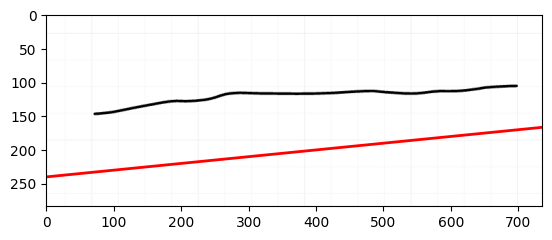

In [94]:
for fn in uploaded:
    img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    edges = multi_scale_edge_detect(img)
    sk = thin(cv2.threshold(edges, 50,255,cv2.THRESH_BINARY)[1])
    lines = vectorize(sk)
    plt.imshow(img, cmap='gray')
    for x0,y0,x1,y1 in lines:
        plt.plot([x0,x1],[y0,y1],'-r',linewidth=2)
    plt.show()

# Part E: Contour-tracking + Quadratic Correction

In [103]:
import cv2, numpy as np, matplotlib.pyplot as plt
from scipy.ndimage import label

In [104]:
uploaded = files.upload()
fn = next(iter(uploaded))

Saving Screenshot from 2025-07-18 20-32-30.png to Screenshot from 2025-07-18 20-32-30 (6).png


In [105]:
img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
_, bw = cv2.threshold(img, 128,255,cv2.THRESH_BINARY_INV)

In [106]:
# Skeletonize
sk = cv2.ximgproc.thinning(bw) if hasattr(cv2.ximgproc,'thinning') else cv2.morphologyEx(bw, cv2.MORPH_HITMISS, None)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
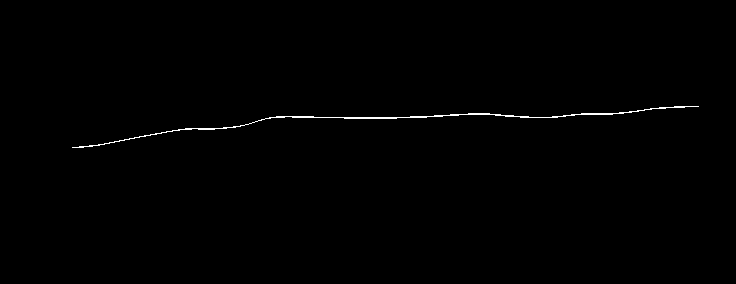

In [107]:
sk

In [108]:
# Extract connected skeleton components
labeled, n = label(sk)

In [111]:
labeled

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [112]:
lines = []

for lbl in range(1, n+1):
    ys, xs = np.where(labeled == lbl)
    pts = np.column_stack((xs, ys))
    if pts.shape[0] < 20: continue
    # quadratic fit: y = ax^2 + bx + c to approximate curvature
    X = np.column_stack((pts[:,0]**2, pts[:,0], np.ones(len(pts))))
    coeffs, *_ = np.linalg.lstsq(X, pts[:,1], rcond=None)
    # sample straight approximation: linear part bx + c
    a,b,c = coeffs
    x0, x1 = pts[:,0].min(), pts[:,0].max()
    y0 = b*x0 + c
    y1 = b*x1 + c
    lines.append((int(x0),int(y0),int(x1),int(y1)))

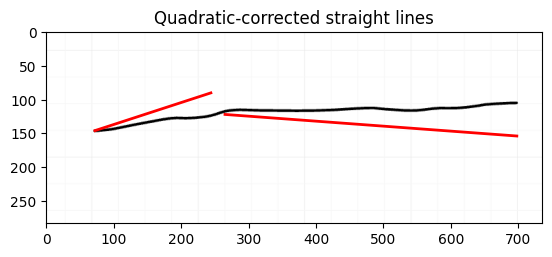

In [113]:
plt.imshow(img, cmap='gray')
for x0,y0,x1,y1 in lines:
    plt.plot([x0,x1],[y0,y1],'-r',linewidth=2)
plt.title("Quadratic‑corrected straight lines")
plt.show()

# Other Useful papers for Beautifying hand-drawn images:

1. "A complete hand-drawn sketch vectorization framework": https://arxiv.org/pdf/1802.05902

2. "An automatic beautifier for drawings and illustrations": https://dl.acm.org/doi/pdf/10.1145/325334.325240

3. "Vectorization of Line Drawings via PolyVector Fields": https://arxiv.org/pdf/1801.01922

4. "Sketch Beautification: Learning Part Beautification and Structure Refinement for Sketches of Man‑made Objects": https://arxiv.org/pdf/2306.05832

5. "Beautification of design sketches using trainable stroke clustering and curve fitting": http://vdel.me.cmu.edu/vdelresource/publications/2011ieee/paper.pdf

6. "Topology‑driven vectorization of clean line drawings": https://media.disneyanimation.com/uploads/production/publication_asset/2/asset/Topology-Driven_Vectorization_of_Clean_Line_Drawings.pdf

7. "Global Beautification of 2D and 3D Layouts with Interactive Ambiguity Resolution": https://hongbofu.people.ust.hk/doc/Layout_tvcg.pdf

8. "Learning to simplify: fully convolutional networks for rough sketch cleanup ": https://esslab.jp/~ess/publications/SimoSerraSIGGRAPH2016.pdf


9. "Recognizing Hand-drawn Diagrams in Images": https://madoc.bib.uni-mannheim.de/64778/2/doctoral_thesis.pdf


